# The Spark Foundation - Data Science and Business Analytics Internship

# Task 2- Prediction using Unsupervised Machine Learning
## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### Author : Shruti Suresh Pawar

In [1]:
# import required libraries.
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load iris dataset.
data=datasets.load_iris()

In [3]:
#convert data from iris dataset into dataframe.
df=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


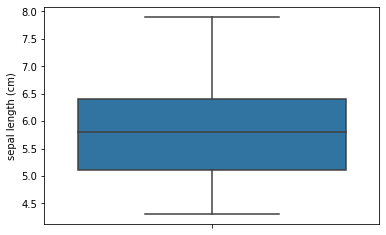

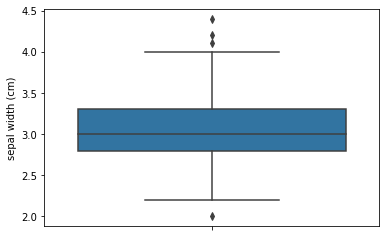

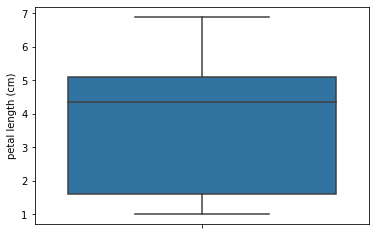

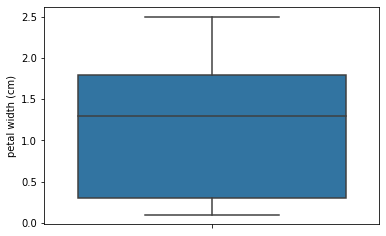

In [8]:
# Ploting box plot.
cols=df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

#### There are some outlier values present at sepal width column.

### Removing Outlier values using IQR Technique.

In [9]:
#finding out lower and upper bound for the values in dataset.
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
iqr=q3-q1
Lower_bound=q1-1.5*iqr
Upper_bound=q3+1.5*iqr
print(Lower_bound)
print(Upper_bound)

2.05
4.05


In [10]:
# removing outlier values.
df=df[(df['sepal width (cm)']>=Lower_bound) & (df['sepal width (cm)']<=Upper_bound)]
df.shape

(146, 4)

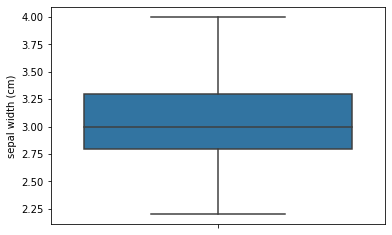

In [11]:
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

### FInding optimum number of clusters for K-means classifier.

In [25]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    



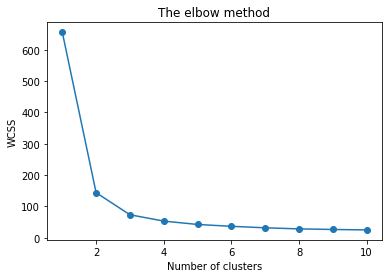

In [26]:
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Applying k-means to the dataset

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising clusters on the first two columns.

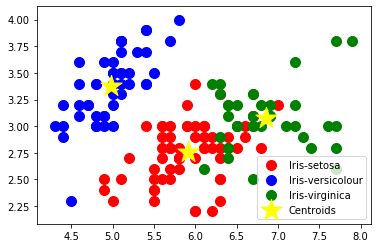

In [31]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 500, c = 'Yellow', label = 'Centroids',marker='*')

plt.legend()